# R1

In [6]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

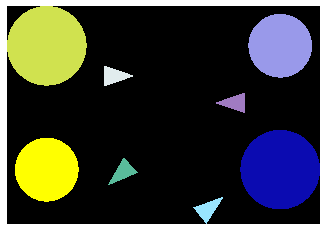

In [16]:
img = cv2.imread("circle.png")

plt.imshow(image,interpolation="none")
plt.axis('off') 
plt.show()

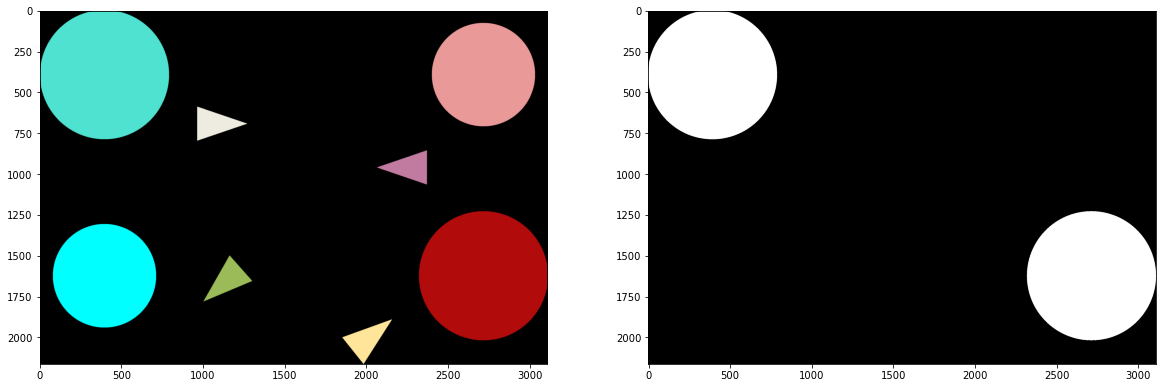

In [24]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([170, 11, 11])  
image_upper_hsv = np.array([177, 15, 15])

image_lower_hsv_1 = np.array([70, 220, 200])  
image_upper_hsv_1 = np.array([79, 226, 208])

mask_hsv = cv2.inRange(img_rgb, image_lower_hsv, image_upper_hsv)
mask_hsv_1 = cv2.inRange(img_rgb, image_lower_hsv_1, image_upper_hsv_1)

img_2 = mask_hsv + mask_hsv_1

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_2, cmap="Greys_r", vmin=0, vmax=255)
plt.show()



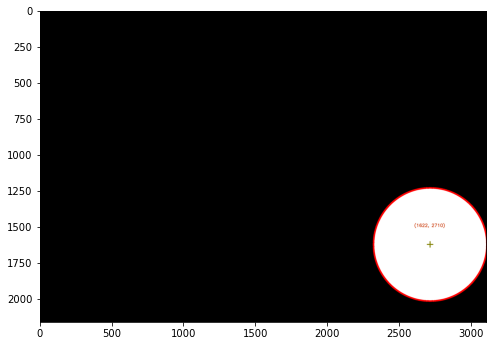

In [40]:
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img1 = mask_rgb.copy()
cv2.drawContours(contornos_img1, contornos, -1, [255, 0, 0], 10);

plt.figure(figsize=(8,6));
plt.imshow(contornos_img1);

cnt = contornos[0]

M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

size = 20
color = (128,128,0)


cv2.line(contornos_img1,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img1,(cx,cy - size),(cx, cy + size),color,5)


font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (2600,1500)

cv2.putText(contornos_img1, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img1)

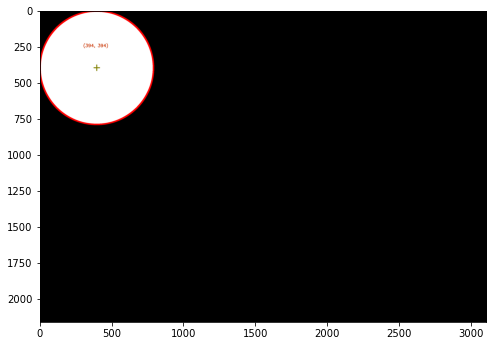

In [44]:
contornos, _ = cv2.findContours(mask_hsv_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb = cv2.cvtColor(mask_hsv_1, cv2.COLOR_GRAY2RGB) 
contornos_img2 = mask_rgb.copy()
cv2.drawContours(contornos_img2, contornos, -1, [255, 0, 0], 10);

plt.figure(figsize=(8,6));
plt.imshow(contornos_img2);

cnt = contornos[0]

M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

size = 20
color = (128,128,0)


cv2.line(contornos_img2,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img2,(cx,cy - size),(cx, cy + size),color,5)


font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (300,250)

cv2.putText(contornos_img2, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img2)


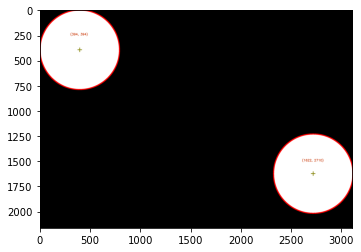

In [37]:
plt.imshow(contornos_img1 + contornos_img2);